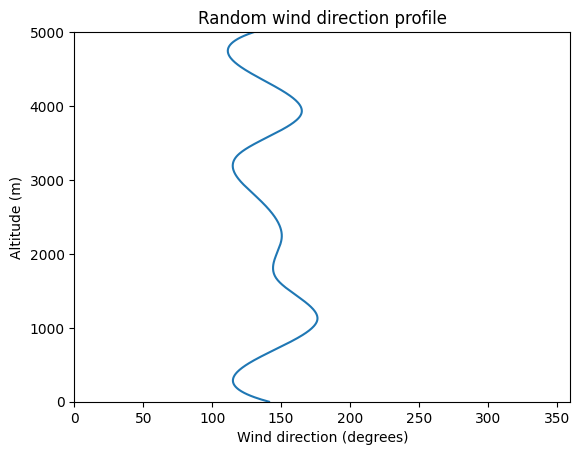

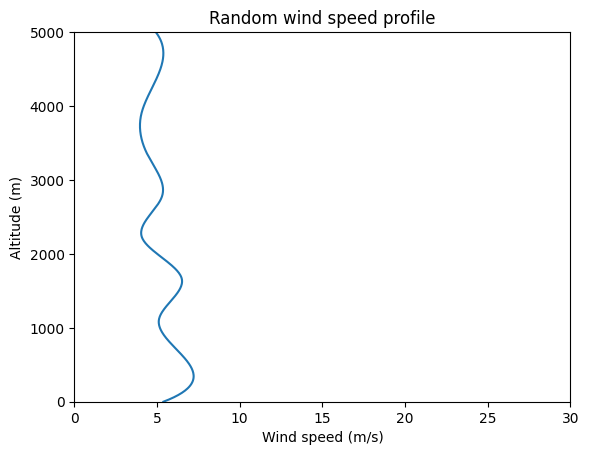

Connector source 'Rocket.outwards.Kin_ang' is dimensionless, but target 'Traj.inwards.ang' has physical unit m.


In [1]:
from cosapp.drivers import RungeKutta
from cosapp.recorders import DataFrameRecorder
from cosapp.drivers import NonLinearSolver, RunOnce, MonteCarlo, RunSingleCase
from cosapp.utils.distributions import Normal
from Earth import Earth
import numpy as np

earth = Earth("earth")

l = 10 #Rocket's length on the plot
dt = 0.05 #Time-step

In [2]:
from cosapp.utils.distributions import Normal
from cosapp.drivers import MonteCarlo
from cosapp.recorders import DataFrameRecorder

def run_analysis(syst, draws=10, linear=True):
    syst.drivers.clear()  # Remove all drivers on the System

    runonce = syst.add_driver(RunOnce("runonce"))
    driver = syst.add_driver(RungeKutta(order=4, dt=dt))
    driver.add_child(NonLinearSolver('solver', factor=1.0))
    driver.time_interval = (0, 40)

    # Define a simulation scenario
    driver.set_scenario(
    init = {
        'Traj.r' : np.array([0., 0., l/2]),
        'Rocket.Kin.v' : np.array([0,0,0]),
        'Rocket.Kin.ar' : np.array([0, -np.pi/2 + 0.2, 0]),
        'Rocket.Kin.av' : np.zeros(3),
        'Para.DynPar.r1' : np.array([0., 0., l/2]), #(should be l because the parachute is at the tip of the rocket)
        'Para.DynPar.r2' : np.array([0., 0., l/2]),
        'Para.DynPar.v1' : np.array([0,0,0]),
        'Para.DynPar.v2' : np.array([0,0,0]),
        'Traj.ParaDep': 0
    },
    stop='Para.DynPar.r1[2] < -1'
    )

    syst.run_drivers()
    print("MONTECARLO")
    # Montecarlo
    syst.drivers.clear()
    montecarlo = syst.add_driver(MonteCarlo('mc'))
    montecarlo.add_recorder(DataFrameRecorder(includes=['Rocket.Kin.ar', 'Traj.r']))
    montecarlo.add_child(driver)
    montecarlo.draws = draws
    # montecarlo.linear = linear

    # parameters for uncertainties in the data
    cant_attr = syst.Rocket.Aero.Coefs.inwards.get_details('delta')
    # Set the distribution around the current value
    cant_attr.distribution = Normal(best=.05, worst=-0.05)
    montecarlo.add_random_variable('Rocket.Aero.Coefs.delta')

    # Computation
    syst.run_drivers()

    return montecarlo.recorder.export_data()

In [3]:
results = run_analysis(earth, draws=2, linear=False)

0.0
0.0
0.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
5.0
5.0
0.0
4.993332540230546
5.0
0.0
4.993332540230546
5.0
0.0
5.0080423252893285
5.0
0.0
5.0080423252893285
5.0
0.0
5.0009500751783005
5.0
0.0
5.0009500751783005
5.0
0.0
5.009105119511065
5.0
0.0
5.009105119511065
5.0
0.0
5.024053847234735
5.0
0.0
5.024053847234735
5.0
0.0
5.069242312264917
5.0
0.0
5.069242312264917
5.0
0.0
5.061886569410602
5.0
0.0
5.061886569410602
5.0
0.0
5.122062577518072
5.0
0.0
5.122062577518072
5.0
0.0
5.159195710628437
5.0
0.0
5.159195710628437
5.0
0.0
5.278895206108008
5.0
0.0
5.278895206108008
5.0
0.0
5.2714013470004595
5.0
0.0
5.2714013470004595
5.0
0.0
5.428188401328544
5.0
0.0
5.428188401328544
5.0
0.0
5.4876

c:\Users\aoyag\Desktop\Etudes\PSC\CosappRepo\rocket-twin\DynamicsPar.py:46: RuntimeWarning: invalid value encountered in divide
  self.a1 = -(self.k / self.m1) * (d-self.l0*d/np.linalg.norm(d)) + np.array([0.,0.,-9.8]) + Drag/self.m1
c:\Users\aoyag\Desktop\Etudes\PSC\CosappRepo\rocket-twin\DynamicsPar.py:47: RuntimeWarning: invalid value encountered in divide
  self.a2 = -(self.k / self.m2) * (-d+self.l0*d/np.linalg.norm(d)) + np.array([0.,0.,-9.8])


ValueError: cannot convert float NaN to integer

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

traj = np.asarray(results['Traj.r'].tolist())
print(traj[:, 0])

# Create the figure object
fig = make_subplots(rows=1, cols=1)
fig.layout.title = "Probability"
fig.layout.yaxis.title = 'Y Position'

fig.add_trace(
    go.Scatter(
        x=traj[:,0],
        y=traj[:,1],
        mode = 'markers'
    ),
    row = 1,
    col = 1,
)
fig.get_subplot(1, 1).xaxis.title = "X Position"

fig.show()

[-0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0.03563626
 -0.03563626 -0.03563626 -0.03563626 -0.03563626 -0